# Explorative Datenanalyse

Im fogenden Notebook ist die explorative Datenanalyse von den 11'760 SRF Artikeln zu 12 unterschielichen Nachnamen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from src.eda import (info_categories,
                     plot_articles_per_cat,
                     plot_cat_per_term,
                     plot_cat_per_term_grid,
)

## Daten einlesen

In [2]:
data = pd.read_csv('../output/df_namen.csv')
data

,Suchbegriff,Titel,Datum,Autor,Kategorie,Unterkategorie
0,Torres,Wechsel von Torres zu Barcelona fix – Mbabu fe...,"28.12.2021, 14:05 Uhr",Unbekannt,Sport,Fussball
1,Torres,Aegerter verpasst das Wunder – Gesamtsieg an T...,"11.10.2020, 14:28 Uhr",Unbekannt,Sport,Motorsport
2,Torres,Honorar von Dufry-Präsident Torres Carretero g...,"30.07.2019, 18:55 Uhr",Lorenzo Bonati,News,Wirtschaft
3,Torres,Torres kündigt Rücktritt an,"20.06.2019, 19:00 Uhr",Unbekannt,Sport,Fussball
4,Torres,Iniesta und Torres sagen «Adios»,"20.05.2018, 22:03 Uhr",Unbekannt,Sport,Fussball
...,...,...,...,...,...,...
11755,Luder,So will die Stadt Luzern ihr Parkplatzproblem ...,"19.05.2020, 10:00 Uhr",Unbekannt,News,News
11756,Luder,Luzerner Kantonsrat verlangt Transparenz über ...,"18.05.2020, 16:18 Uhr",Unbekannt,News,News
11757,Luder,Luzerner Kantonsparlament verschiebt Corona-De...,"17.05.2020, 15:08 Uhr",Unbekannt,News,News
11758,Luder,Luzern trainiert bereits am 18. Mai wieder,"16.05.2020, 11:30 Uhr",Unbekannt,Sport,Fussball


## Erster Überblick

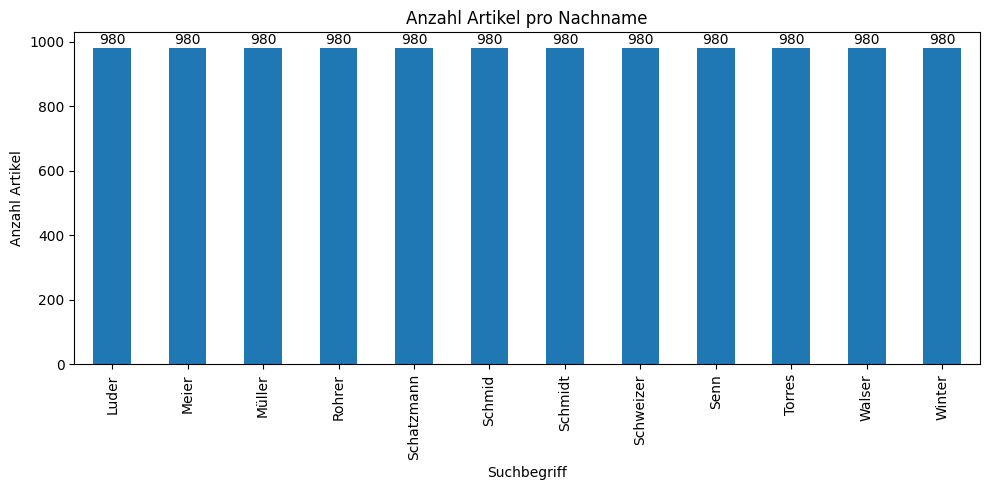

In [3]:
# visueller doppelcheck, dass es pro Nachnamen 980 Artikel gibt

plt.figure(figsize=(10, 5))
data['Suchbegriff'].value_counts().sort_index().plot(kind='bar')
# Anzahl der Artikel oberhalb der Balken anzeigen
for index, value in enumerate(data['Suchbegriff'].value_counts().sort_index()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Anzahl Artikel pro Nachname')
plt.tight_layout()
plt.show()

In [4]:
# Anzahl Artikel je Kategorie über das gesamte df
info_categories(data, "Kategorie")

info_categories(data, 'Unterkategorie')

Distinct count of Kategorie: 159

Kategorie
Sport                   4476
News                    4366
Kultur                  1157
Radio SRF 3              236
Glanz & Gloria           204
Wissen                   193
Radio SRF 1              171
Radio SRF Musikwelle     146
Kassensturz Espresso     142
Meteo                    124
Name: count, dtype: int64

Distinct count of Unterkategorie: 159

Unterkategorie
News                       1821
Fussball                   1705
Schweiz                    1377
Mehr Sport                 1229
Eishockey                  1089
International               755
Film & Serien               437
Wirtschaft                  297
Gesellschaft & Religion     250
Glanz & Gloria              191
Name: count, dtype: int64



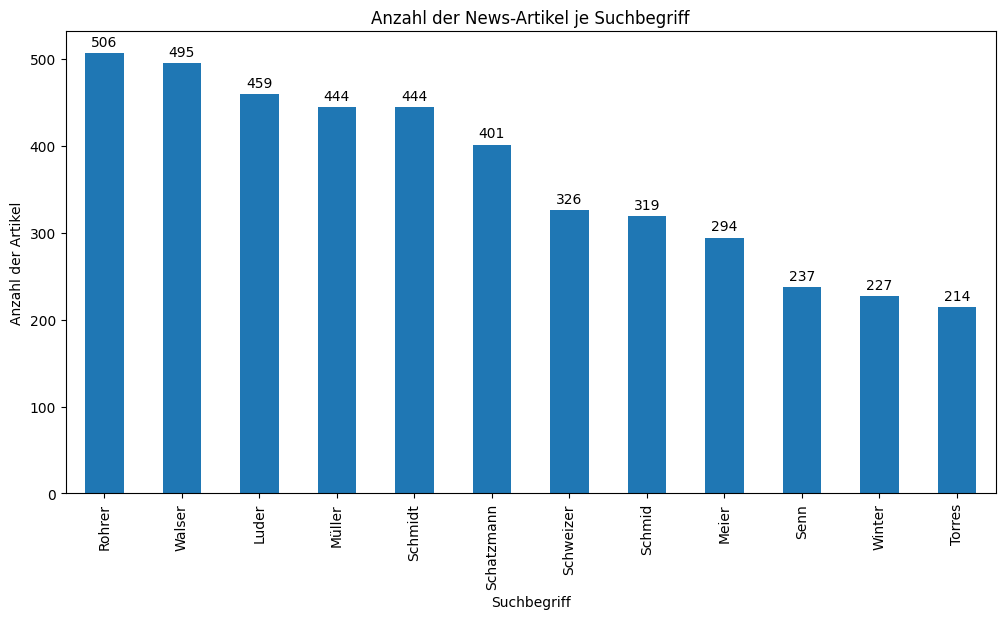

In [5]:
# für eine beliebige Kategorie die Anzahl Artikel je Nachnamen
plot_articles_per_cat(data, "News")

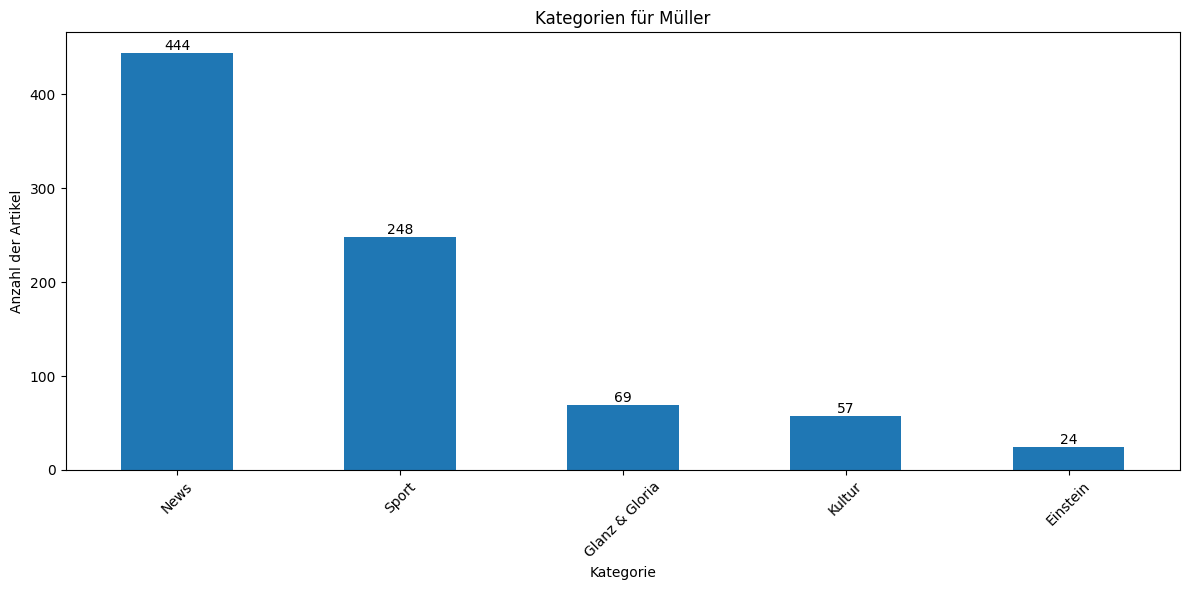

In [6]:
# Für beliebigen Nachnamen die top 5 Kategorien
plot_cat_per_term(data, "Müller")

/var/folders/0l/jk3grg717z34yf9xh85kj0bh0000gn/T/ipykernel_49113/398492287.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


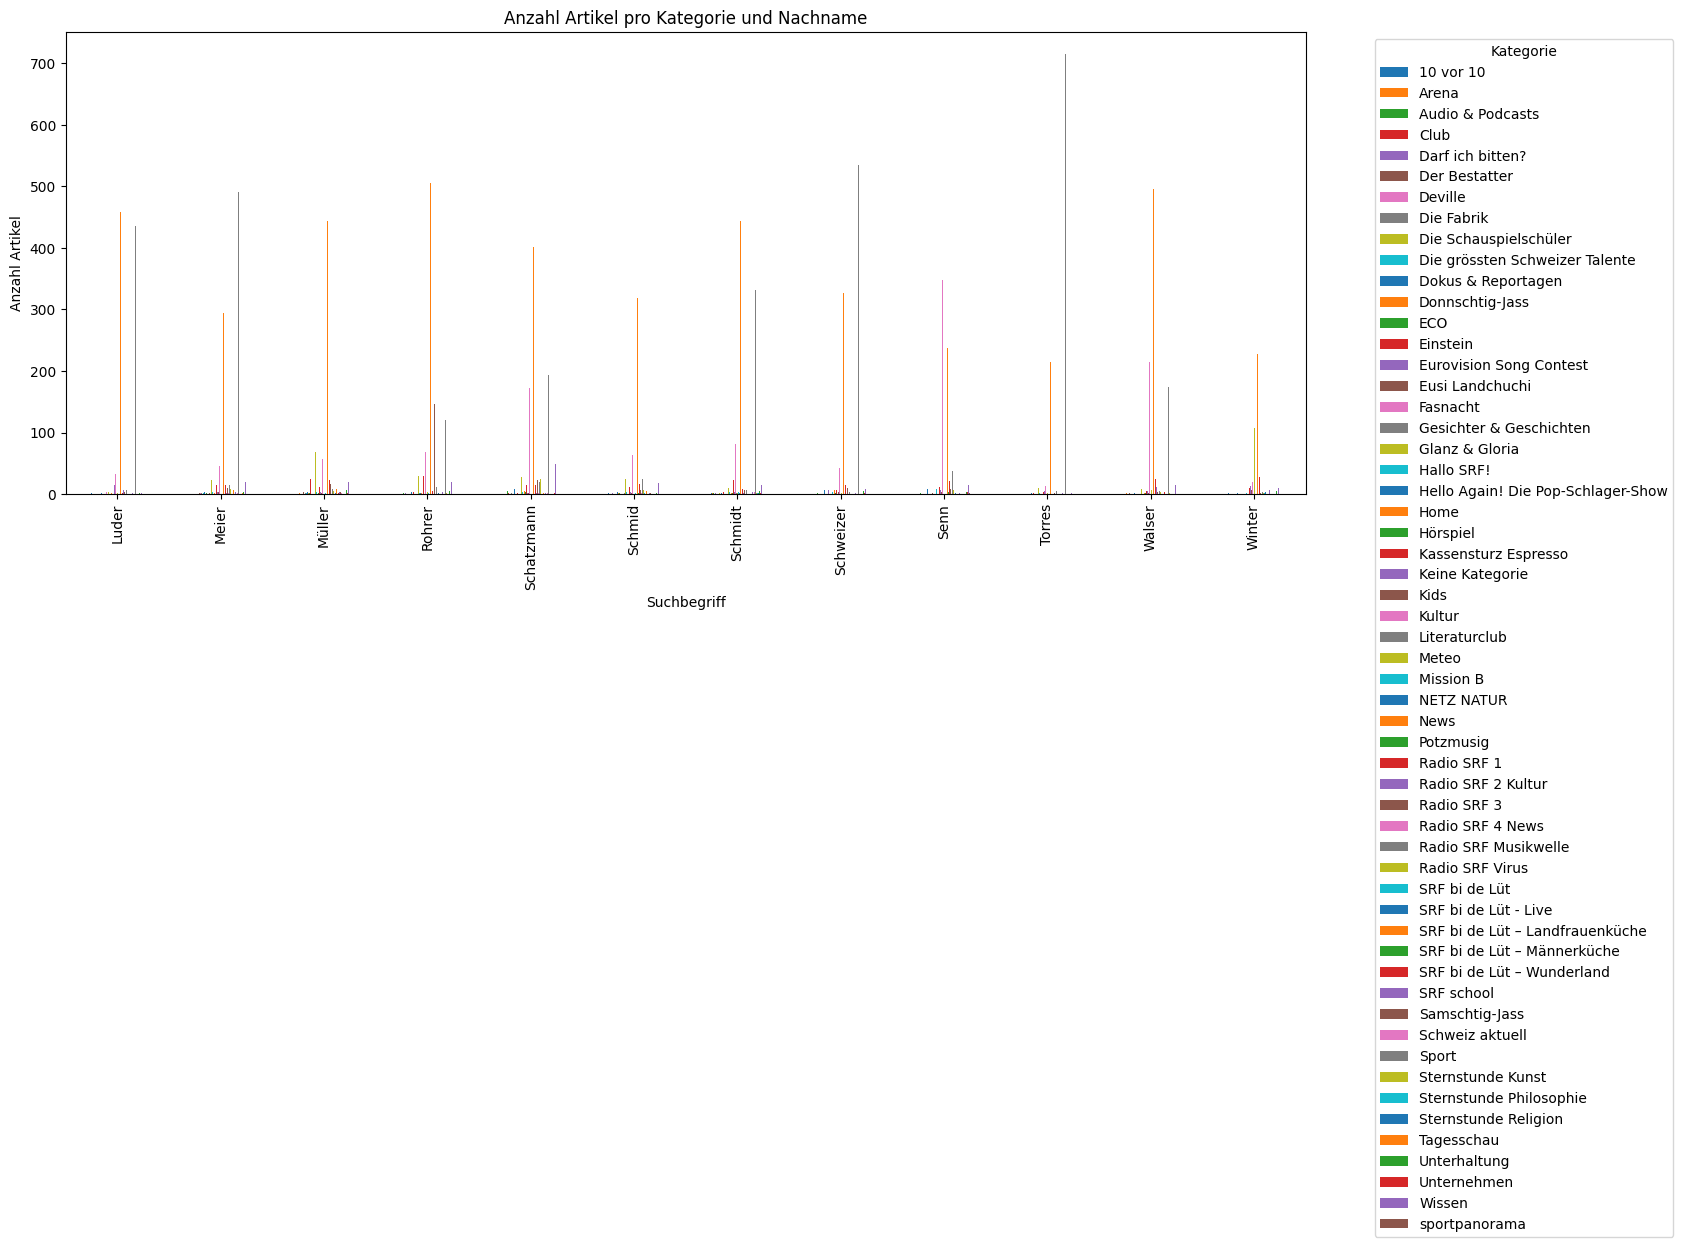

In [7]:
# isch trash, han en gliich drin gloh zum zeige, dassi de gmacht han und ggf chunt der en idee, wie besser mache
category_counts = data.groupby(['Suchbegriff', 'Kategorie']).size().unstack(fill_value=0)
category_counts.plot(kind='bar', figsize=(16, 6))
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Anzahl Artikel pro Kategorie und Nachname')
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# für alle Nachnamen die Kategorien von denen es mehr wie 50 Artikel gibt anzeigen
filtered_category_counts = category_counts.loc[:, category_counts.sum() >50]
filtered_category_counts.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Gestapelte Kategorien pro Nachname')
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(category_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.xlabel('Kategorie')
plt.ylabel('Suchbegriff')
plt.title('Heatmap: Artikelanzahl pro Nachname und Kategorie')
plt.tight_layout()
plt.show()


In [ ]:
import squarify

# Top 10 Kombinationen für Übersichtlichkeit
top_combos = data.groupby(['Suchbegriff', 'Kategorie']).size().sort_values(ascending=False).head(10)
labels = [f"{i[0]}\n{i[1]}\n{v}" for i, v in top_combos.items()]
sizes = top_combos.values

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title('Tree Map: Top 10 Nachname-Kategorie-Kombis')
plt.axis('off')
plt.tight_layout()
plt.show()

# Bar chart for the same data
plt.figure(figsize=(12, 6))
bars = plt.barh([f"{i[0]} - {i[1]}" for i in top_combos.index], sizes, color='skyblue')
plt.xlabel('Anzahl')
plt.ylabel('Nachname - Kategorie')

# Anzahl der Artikel rechts neben den Bars anzeigen
for bar, size in zip(bars, sizes):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(size), va='center')
plt.title('Bar Chart: Top 10 Nachname-Kategorie-Kombis')
plt.tight_layout()
plt.show()


In [ ]:
# Beispiel-Aufruf:
suchbegriffe = [
    "Rohrer", "Meier", "Senn", 
    "Schweizer", "Walser", "Luder", 
    "Torres", "Schatzmann", "Schmidt",
    "Müller", "Schmid", "Winter"
]
plot_cat_per_term_grid(data, suchbegriffe)


In [ ]:
# Datum in ein Datetime-Objekt umwandeln
data['Datum_clean'] = pd.to_datetime(data['Datum'].str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0], format='%d.%m.%Y', errors='coerce')

# Nach Jahr gruppieren
data['Jahr'] = data['Datum_clean'].dt.year
yearly_counts = data.groupby(['Jahr', 'Suchbegriff']).size().unstack(fill_value=0)

yearly_counts.plot(figsize=(14, 7))
plt.xlabel('Jahr')
plt.ylabel('Anzahl Artikel')
plt.title('Artikelanzahl pro Nachname im Zeitverlauf')
plt.legend(title='Suchbegriff', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyse über die gereinigentn Daten

In [ ]:
top_categories = data['Kategorie'].value_counts().head(10).index
data['Kategorie'] = data['Kategorie'].apply(lambda x: x if x in top_categories else 'Diverses')

In [ ]:
data

In [ ]:
category_counts = data.groupby(['Suchbegriff', 'Kategorie']).size().unstack(fill_value=0)


plt.figure(figsize=(14, 7))
sns.heatmap(category_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.xlabel('Kategorie')
plt.ylabel('Suchbegriff')
plt.title('Heatmap: Artikelanzahl pro Nachname und Kategorie')
plt.tight_layout()
plt.show()